In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding = 'SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

#convolution layer one
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


#convolution layer two
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


#fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#output layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

#save_path = saver.save(sess, "/root/model.ckpt")

step 0, training accuracy 0.06
step 100, training accuracy 0.86
step 200, training accuracy 0.86
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.94
step 1000, training accuracy 0.98
step 1100, training accuracy 0.92
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 1
step 1500, training accuracy 0.92
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 0.98
step 2600, training accuracy 0.96
step 2700, training accuracy 0.96
step 2800, training accuracy 0.98
step 2900, training accuracy 0.96
step 3000, train

PermissionDeniedError: /root/model.ckpt.data-00000-of-00001.tempstate14272086675540036131
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, Variable, Variable/Adam, Variable/Adam_1, Variable_1, Variable_1/Adam, Variable_1/Adam_1, Variable_2, Variable_2/Adam, Variable_2/Adam_1, Variable_3, Variable_3/Adam, Variable_3/Adam_1, Variable_4, Variable_4/Adam, Variable_4/Adam_1, Variable_5, Variable_5/Adam, Variable_5/Adam_1, Variable_6, Variable_6/Adam, Variable_6/Adam_1, Variable_7, Variable_7/Adam, Variable_7/Adam_1, beta1_power, beta2_power)]]

Caused by op u'save/SaveV2', defined at:
  File "/home/nbuser/anaconda2_501/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/nbuser/anaconda2_501/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/nbcommon/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-078dc7e2c40e>", line 6, in <module>
    saver = tf.train.Saver()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1056, in __init__
    self.build()
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 689, in build
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 276, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 219, in save_op
    tensors)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 780, in save_v2
    tensors=tensors, name=name)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

PermissionDeniedError (see above for traceback): /root/model.ckpt.data-00000-of-00001.tempstate14272086675540036131
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, Variable, Variable/Adam, Variable/Adam_1, Variable_1, Variable_1/Adam, Variable_1/Adam_1, Variable_2, Variable_2/Adam, Variable_2/Adam_1, Variable_3, Variable_3/Adam, Variable_3/Adam_1, Variable_4, Variable_4/Adam, Variable_4/Adam_1, Variable_5, Variable_5/Adam, Variable_5/Adam_1, Variable_6, Variable_6/Adam, Variable_6/Adam_1, Variable_7, Variable_7/Adam, Variable_7/Adam_1, beta1_power, beta2_power)]]


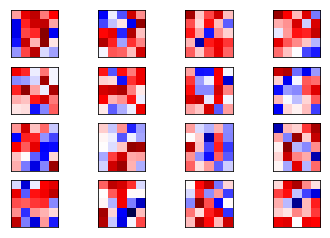

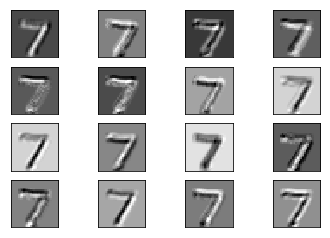

In [5]:
def plot_conv_weights(weights, num_filters, input_channel = 0):
    
    # 這裡的 w 我們預計是一個 4 維的 tensor，ex. [5, 5, 1, 32]
    # 因此要先用 session 取出數值變成 ndarray
    w = sess.run(weights)
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = w[:, :, input_channel, i]
            
            ax.imshow(img, vmin = w_min, vmax=w_max, interpolation = 'nearest', cmap = 'seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

def plot_conv_layer(layer, image, num_filters):
    # layer 輸入範例是 [batch_num, width, height, channels] ex. [1, 28, 28, 32]
    # 這裡設定的 image 是單一個手寫字影像輸入
    # 接下來把它餵入 tensorflow 的 session 跑出我們想要的輸出結果
    output = sess.run(layer, feed_dict = {x: [image]})
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = output[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()



plot_conv_weights(W_conv1, 16)

output_conv1 = conv2d(x_image, W_conv1) + b_conv1
image1 = mnist.test.images[0]
plot_conv_layer(output_conv1, image1, 16)

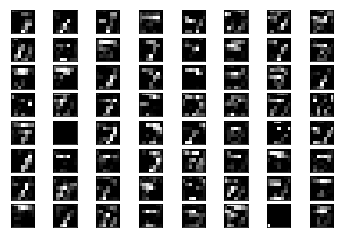

In [7]:
# 印出第二層經過 MaxPooling 的結果
plot_conv_layer(max_pool_2x2(tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)), mnist.test.images[0], 64)